In [84]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import numpy as np

In [2]:
APIKEY='457b3f51-eef5-4567-8353-348b89b2e784'

zap=f'https://static-maps.yandex.ru/v1?bbox={lefdown}~{rigup}&lang=ru_RU&apikey={APIKEY}'


In [28]:
lefdown=[47.212827, 39.628617]
lefdown.reverse()
str(lefdown)[1:-1]

'39.628617, 47.212827'

In [217]:
coordinates={
    '1':[5, 5],
    '2':[5, -5],
    '3':[-5, 5],
    '4':[-5, -5],
}

In [218]:
def ll_and_spn(coordinates):
    c=np.array(list(coordinates.values()))
    x_center=round(np.average(c.T[0]),6)
    y_center=round(np.average(c.T[1]),6)
    dx=round(np.max(c.T[0])-np.min(c.T[0]),6)
    dy=round(np.max(c.T[1])-np.min(c.T[1]),6)
    spn=max(dx,dy)
    return x_center,y_center,spn

In [220]:
ll_and_spn(coordinates)

(0.0, 0.0, 10)

In [215]:
def cpt(coordinates):
    pt=''
    for string in coordinates:
        x=str(coordinates[string][0])
        y=str(coordinates[string][1])
        # print(x)
        pt+=f'{y},{x},{string}~'
    return pt[:-1]
cpt(coordinates)


'5,5,1~0,5,2~5,0,3~-5,-5,4'

In [209]:
xc,yc,spn=ll_and_spn(coordinates)


aa=f'{yc},{xc},22'
aa+=f'~{round(yc+spn/2,6)},{round(xc+spn/2,6)},1'
aa+=f'~{round(yc-spn/2,6)},{round(xc-spn/2,6)},2'
aa+=f'~{round(yc+spn/2,6)},{round(xc-spn/2,6)},3'
aa+=f'~{round(yc-spn/2,6)},{round(xc+spn/2,6)},4'
aa

'-0.24776,0.250053,22~5.383912,5.881725,1~-5.879432,-5.381619,2~5.383912,-5.381619,3~-5.879432,5.881725,4'

In [ ]:
'39.632077,47.213627,22~39.634722,47.216272,1~39.629432,47.210982,2~39.634722,47.210982,3~39.629432,47.216272,4'

In [219]:
url = "https://static-maps.yandex.ru/v1"
lefdown='39.626394,47.212652'
rigup='39.639779,47.222940'
xc,yc,spn=ll_and_spn(coordinates)
spn=spn
params = {
    'll':f'{yc},{xc}',
    'spn':f'{spn},{spn}',
    # 'bbox':'36.382077,44.713627~39.382839,47.714389',
    # 'scale':2,
    'size': '450,450',
    # 'pt':aa
    'pt':cpt(coordinates)
}
params['apikey'] = '457b3f51-eef5-4567-8353-348b89b2e784'

response = requests.get(url, params=params)
if response.status_code == 200:
    with open("map.png", "wb") as file:
        file.write(response.content)
    print("Карта успешно сохранена как map.png")
    image = Image.open(BytesIO(response.content))
else:
    print("Ошибка:", response.status_code)
    print("Текст ошибки:", response.text)

Карта успешно сохранена как map.png


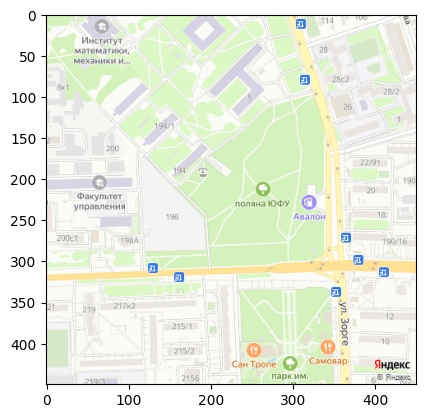

In [127]:
plt.imshow(image)

50 точек с поверхности: (50, 3)
[[-3.10344828 -8.62068966  1.3026918 ]
 [ 1.72413793  8.62068966  1.06290044]
 [ 4.48275862 -5.17241379  1.40489466]
 [ 2.4137931   3.10344828  4.82802993]
 [-3.79310345 -9.31034483  1.08490121]]
Выбрано точек: 50
Форма массива точек: (50, 3)
Первые 5 точек:
[[-3.10344828 -8.62068966  1.3026918 ]
 [ 1.72413793  8.62068966  1.06290044]
 [ 4.48275862 -5.17241379  1.40489466]
 [ 2.4137931   3.10344828  4.82802993]
 [-3.79310345 -9.31034483  1.08490121]]

Минимальное значение Z: 1.00
Максимальное значение Z: 4.99
Среднее значение Z: 1.75


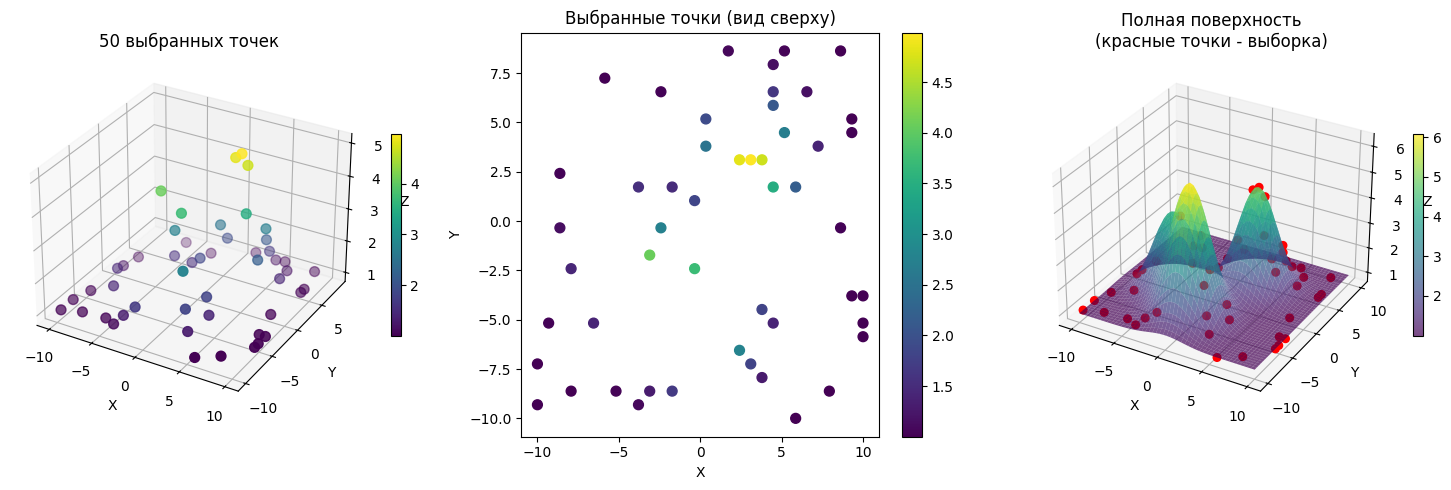

ValueError: too many values to unpack (expected 2)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def get_50_surface_points(x_range=(-10, 10), y_range=(-10, 10), seed=None):
    """
    Упрощенная функция: генерирует поверхность и возвращает только 50 точек.
    
    Возвращает:
    - points: массив формы (50, 3) с координатами [x, y, z]
    """
    if seed is not None:
        np.random.seed(seed)
    
    # Создаем плотную сетку для генерации поверхности
    grid_resolution = 30
    x = np.linspace(x_range[0], x_range[1], grid_resolution)
    y = np.linspace(y_range[0], y_range[1], grid_resolution)
    X, Y = np.meshgrid(x, y)
    
    # Базовая поверхность
    Z = np.full_like(X, 1.0)
    
    # Три максимума
    peaks = [(3, 3, 4), (-4, -2, 3), (0, -5, 5)]
    for px, py, height in peaks:
        sigma = 2.0
        distance_squared = (X - px)**2 + (Y - py)**2
        peak = height * np.exp(-distance_squared / (2 * sigma**2))
        Z += peak
    
    # Выбираем 50 случайных точек
    all_points = np.column_stack([X.ravel(), Y.ravel(), Z.ravel()])
    indices = np.random.choice(len(all_points), 50, replace=False)
    selected_points = all_points[indices]
    
    return selected_points

# Пример использования упрощенной версии
if __name__ == "__main__":
    points = get_50_surface_points(seed=42)
    print(f"50 точек с поверхности: {points.shape}")
    print(points[:5])

def plot_results(selected_points, full_surface=None):
    """
    Визуализирует выбранные точки и (опционально) полную поверхность.
    """
    fig = plt.figure(figsize=(15, 5))
    
    # 1. 3D scatter plot выбранных точек
    ax1 = fig.add_subplot(131, projection='3d')
    scatter1 = ax1.scatter(selected_points[:, 0], selected_points[:, 1], selected_points[:, 2], 
                          c=selected_points[:, 2], cmap='viridis', s=50)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('50 выбранных точек')
    plt.colorbar(scatter1, ax=ax1, shrink=0.5)
    
    # 2. 2D scatter plot выбранных точек (вид сверху)
    ax2 = fig.add_subplot(132)
    scatter2 = ax2.scatter(selected_points[:, 0], selected_points[:, 1], c=selected_points[:, 2], 
                          cmap='viridis', s=50)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Выбранные точки (вид сверху)')
    plt.colorbar(scatter2, ax=ax2)
    
    # 3. Полная поверхность (если передана)
    if full_surface is not None:
        ax3 = fig.add_subplot(133, projection='3d')
        X, Y, Z = full_surface
        surf = ax3.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
        # Отмечаем выбранные точки на поверхности
        ax3.scatter(selected_points[:, 0], selected_points[:, 1], selected_points[:, 2], 
                   color='red', s=30, alpha=1.0)
        ax3.set_xlabel('X')
        ax3.set_ylabel('Y')
        ax3.set_zlabel('Z')
        ax3.set_title('Полная поверхность\n(красные точки - выборка)')
        plt.colorbar(surf, ax=ax3, shrink=0.5)
    
    plt.tight_layout()
    plt.show()

# Пример использования
if __name__ == "__main__":
    # Генерируем поверхность и выбираем 50 точек
    selected_points= get_50_surface_points(seed=42)
    
    # Выводим информацию
    print(f"Выбрано точек: {len(selected_points)}")
    print(f"Форма массива точек: {selected_points.shape}")
    print(f"Первые 5 точек:")
    print(selected_points[:5])
    print(f"\nМинимальное значение Z: {selected_points[:, 2].min():.2f}")
    print(f"Максимальное значение Z: {selected_points[:, 2].max():.2f}")
    print(f"Среднее значение Z: {selected_points[:, 2].mean():.2f}")
    
    # Визуализируем результаты
    plot_results(selected_points, full_surface)
    
    # Если нужно только 50 точек без полной поверхности:
    points_only, _ = get_50_surface_points(seed=42)
    print(f"\nТолько точки: {points_only.shape}")

ИСХОДНЫЕ ДАННЫЕ:
Форма данных: (100, 4)
Первые 5 строк:
[[179.96714153  48.76943887  72.39713046 161.90635731]
 [173.61735699  63.69032016  63.9276543   44.39637637]
 [181.47688538  64.85928225  61.21497594 182.45459308]
 [190.23029856  57.96584096  61.55401321 137.87880919]
 [172.65846625  67.58071433  40.28845138  30.89481305]]

Статистика исходных данных:
----------------------------------------
Рост (см)       | Среднее:  174.0 | Std:    9.0
Вес (кг)        | Среднее:   70.3 | Std:   14.2
Возраст (лет)   | Среднее:   48.2 | Std:   17.0
Доход (тыс.$)   | Среднее:   72.8 | Std:   51.3

ПОСЛЕ СТАНДАРТИЗАЦИИ (fit_transform):
Форма данных: (100, 4)
Первые 5 строк:
[[ 0.66461921 -1.51511491  1.42444467  1.7379916 ]
 [-0.03808894 -0.46680916  0.9255676  -0.55440556]
 [ 0.83169721 -0.38468065  0.76578286  2.13884876]
 [ 1.80040643 -0.8689975   0.78575315  1.26925964]
 [-0.14420598 -0.19347929 -0.46685103 -0.81779549]]

Статистика после стандартизации:
--------------------------------------

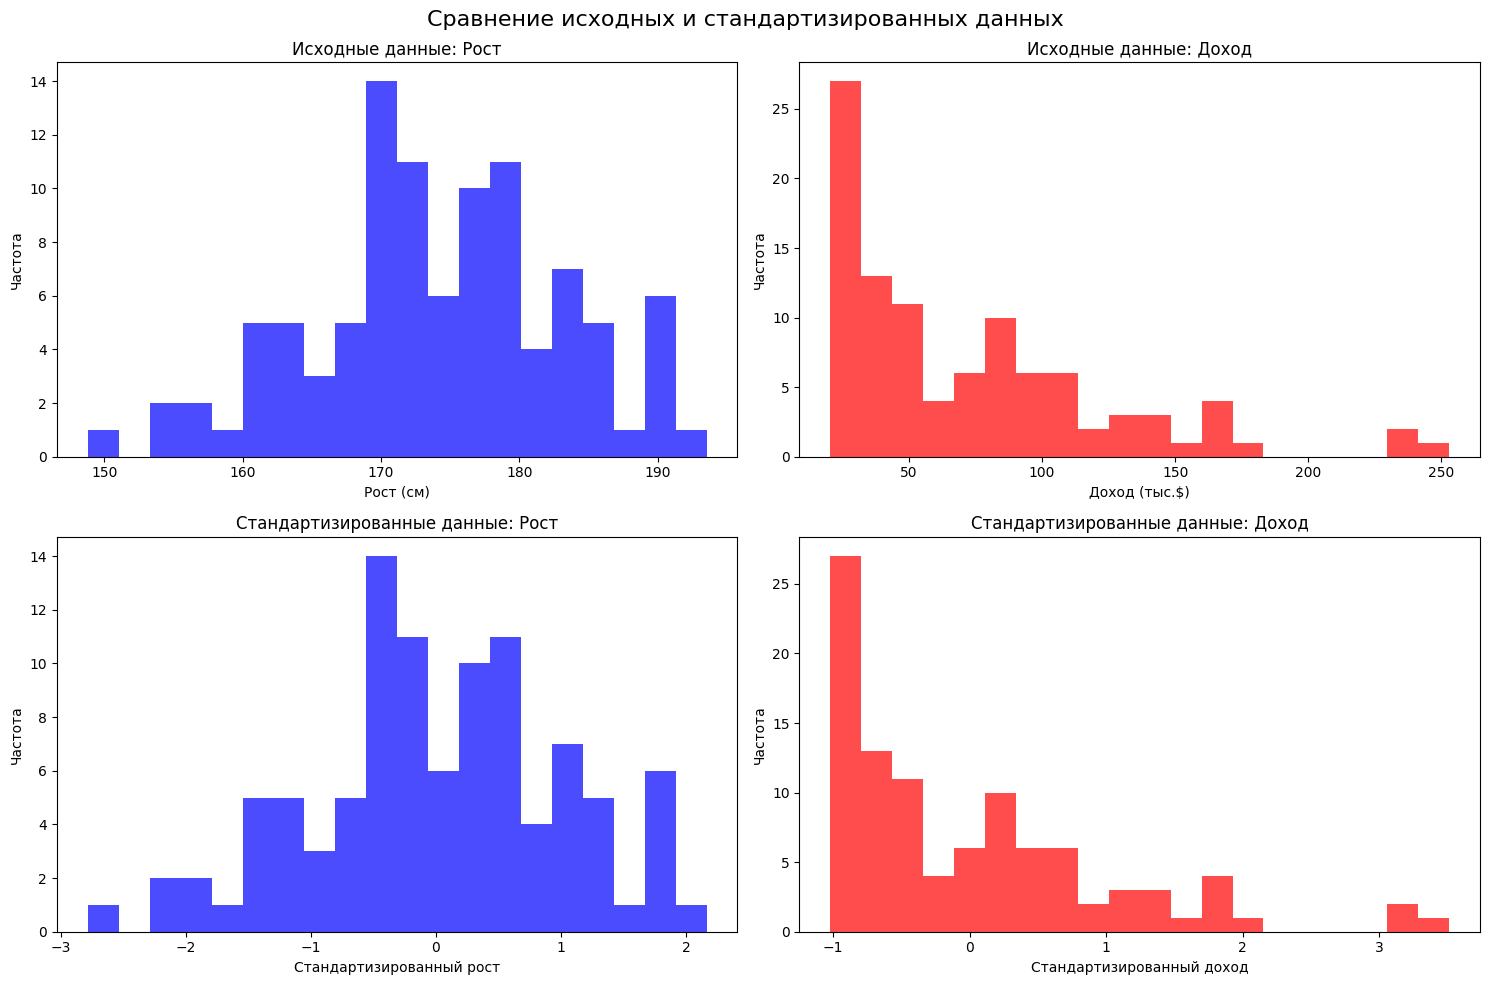


ДЕМОНСТРАЦИЯ ОТДЕЛЬНЫХ ШАГОВ:
1. Метод fit() - вычисление параметров:
Средние значения: [173.96153483  70.33456881  48.21421879  72.81561724]
Стандартные отклонения: [ 9.03616177 14.23332961 16.97708039 51.26074264]

2. Метод transform() - применение преобразования:
Результат совпадает с fit_transform: True

3. Применение к новым данным:
Новые данные: [[180  75  30  60]]
Стандартизированные: [[ 0.66825554  0.32778214 -1.07287109 -0.25000842]]

ФОРМУЛА СТАНДАРТИЗАЦИИ:
z = (x - mean) / std
где:
- x - исходное значение
- mean - среднее значение признака
- std - стандартное отклонение признака
- z - стандартизированное значение


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Создаем демонстрационные данные
np.random.seed(42)

# Исходные данные с разными масштабами
# Признак 1: рост (в см) - значения от 150 до 200
height = np.random.normal(175, 10, 100)  # средний рост 175 см, std = 10

# Признак 2: вес (в кг) - значения от 50 до 100  
weight = np.random.normal(70, 15, 100)   # средний вес 70 кг, std = 15

# Признак 3: возраст (в годах) - значения от 18 до 80
age = np.random.uniform(18, 80, 100)

# Признак 4: доход (в тысячах $) - значения от 20 до 200
income = np.random.exponential(50, 100) + 20  # экспоненциальное распределение

# Создаем матрицу признаков
X_original = np.column_stack([height, weight, age, income])

print("ИСХОДНЫЕ ДАННЫЕ:")
print("=" * 50)
print(f"Форма данных: {X_original.shape}")
print(f"Первые 5 строк:\n{X_original[:5]}")
print()

# Статистика по каждому признаку
features_names = ['Рост (см)', 'Вес (кг)', 'Возраст (лет)', 'Доход (тыс.$)']
print("Статистика исходных данных:")
print("-" * 40)
for i, name in enumerate(features_names):
    print(f"{name:15} | Среднее: {X_original[:, i].mean():6.1f} | Std: {X_original[:, i].std():6.1f}")

print("\n" + "=" * 50)

# Создаем StandardScaler
scaler = StandardScaler()

# Применяем fit_transform - обучение на данных и их преобразование
X_scaled = scaler.fit_transform(X_original)

print("ПОСЛЕ СТАНДАРТИЗАЦИИ (fit_transform):")
print("=" * 50)
print(f"Форма данных: {X_scaled.shape}")
print(f"Первые 5 строк:\n{X_scaled[:5]}")
print()

print("Статистика после стандартизации:")
print("-" * 40)
for i, name in enumerate(features_names):
    print(f"{name:15} | Среднее: {X_scaled[:, i].mean():6.2f} | Std: {X_scaled[:, i].std():6.2f}")

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Сравнение исходных и стандартизированных данных', fontsize=16)

# Гистограммы исходных данных
axes[0, 0].hist(X_original[:, 0], bins=20, alpha=0.7, color='blue')
axes[0, 0].set_title('Исходные данные: Рост')
axes[0, 0].set_xlabel('Рост (см)')
axes[0, 0].set_ylabel('Частота')

axes[0, 1].hist(X_original[:, 3], bins=20, alpha=0.7, color='red')
axes[0, 1].set_title('Исходные данные: Доход')
axes[0, 1].set_xlabel('Доход (тыс.$)')
axes[0, 1].set_ylabel('Частота')

# Гистограммы стандартизированных данных
axes[1, 0].hist(X_scaled[:, 0], bins=20, alpha=0.7, color='blue')
axes[1, 0].set_title('Стандартизированные данные: Рост')
axes[1, 0].set_xlabel('Стандартизированный рост')
axes[1, 0].set_ylabel('Частота')

axes[1, 1].hist(X_scaled[:, 3], bins=20, alpha=0.7, color='red')
axes[1, 1].set_title('Стандартизированные данные: Доход')
axes[1, 1].set_xlabel('Стандартизированный доход')
axes[1, 1].set_ylabel('Частота')

plt.tight_layout()
plt.show()

# Демонстрация отдельных шагов fit и transform
print("\nДЕМОНСТРАЦИЯ ОТДЕЛЬНЫХ ШАГОВ:")
print("=" * 50)

# Создаем новый экземпляр scaler
scaler_demo = StandardScaler()

# Шаг 1: fit - вычисление параметров (среднее и std)
print("1. Метод fit() - вычисление параметров:")
scaler_demo.fit(X_original)
print(f"Средние значения: {scaler_demo.mean_}")
print(f"Стандартные отклонения: {scaler_demo.scale_}")

# Шаг 2: transform - применение преобразования
print("\n2. Метод transform() - применение преобразования:")
X_demo_scaled = scaler_demo.transform(X_original)
print(f"Результат совпадает с fit_transform: {np.allclose(X_scaled, X_demo_scaled)}")

# Пример использования сохраненных параметров для новых данных
print("\n3. Применение к новым данным:")
new_data = np.array([[180, 75, 30, 60]])  # новые наблюдения
new_data_scaled = scaler.transform(new_data)  # используем уже обученный scaler
print(f"Новые данные: {new_data}")
print(f"Стандартизированные: {new_data_scaled}")

# Формула стандартизации
print("\nФОРМУЛА СТАНДАРТИЗАЦИИ:")
print("=" * 50)
print("z = (x - mean) / std")
print("где:")
print("- x - исходное значение")
print("- mean - среднее значение признака")
print("- std - стандартное отклонение признака")
print("- z - стандартизированное значение")